# 1. Dataset Description & Basic Information 

### 1.1 Load Data Set

In [4]:
import pandas as pd

df = pd.read_csv('winequality-red-messed-up.csv', sep=';', header=0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,50.0,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 1.2 Dataset Overview

In [5]:
df.shape

(1599, 12)

### 1.3 Feature's Overview

1. fixed acidity: Most acids involved with wine are fixed or nonvolatile.
2. volatile acidity: Amount of acetic acid in wine (high levels → vinegar taste).
3. citric acid: Adds freshness and flavor in small quantities.
4. residual sugar: Sugar remaining after fermentation stops.
5. chlorides: Salt content in the wine.
6. free sulfur dioxide: The free form of SO₂ that prevents spoilage.
7. total sulfur dioxide: Total amount of SO₂ (free + bound).
8. density: Depends on the percent alcohol and sugar in the wine.
9. pH: Scale of acidity/basicity (0 to 14), wines usually in ~3–4 range.
10. sulphates: Antimicrobial and antioxidant additive.
11. alcohol: Percent alcohol content of the wine.
12. quality: Integer (usually 3–8 in practice) rating of wine quality.

### 1.4 Basic Statistics

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1552.000000,1599.000000,1599.000000,1599.000000,1599.000000,1504.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.269902,2.546263,0.088540,15.874922,46.467792,1.009521,3.309993,0.658149,10.577830,5.636023
std,1.741096,0.179060,0.194643,1.424727,0.051662,10.460157,32.895324,0.249050,0.154604,0.169507,2.857846,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.000000,1.000000,6.000000,0.100000,2.740000,0.330000,0.000000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.091000,21.000000,62.000000,0.997855,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.630000,72.000000,289.000000,5.000000,4.010000,2.000000,50.000000,8.000000


# 2. Identification of Data Quality Issues

### 2.1 Missing Values

In [12]:
missings = df.isnull().sum()
missings[missings > 0]

residual sugar    47
pH                95
dtype: int64

### 2.2 Duplicated Entries

In [15]:
duplicates = df.duplicated().sum()
duplicates

188

### 2.3 Invalid Ranges

In [23]:
invalid_ranges = df[
    (df['fixed acidity'] < 0) |
    (df['volatile acidity'] < 0) |
    (df['citric acid'] < 0) |
    (df['residual sugar'] < 0) |
    (df['chlorides'] < 0) |
    (df['free sulfur dioxide'] < 0) |
    (df['total sulfur dioxide'] < 0) |
    (df['density'] < 0) |
    (df['pH'] < 0) |
    (df['sulphates'] < 0) |
    (df['alcohol'] < 0)
]
print("Rows with invalid ranges:" + str(len(invalid_ranges)))

Rows with invalid ranges:0


### 2.4 Anomalies and/or Outliers

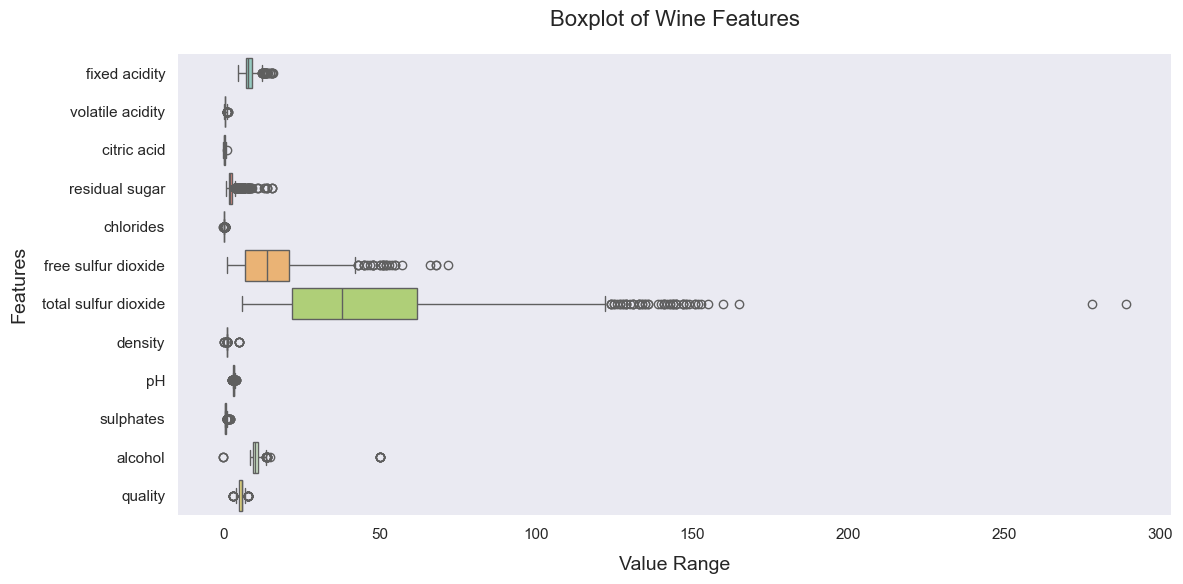

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="dark", context="notebook")

plt.figure(figsize=(12, 6))

sns.boxplot(data=df, orient="h", palette="Set3")

plt.title("Boxplot of Wine Features", fontsize=16, pad=20)
plt.xlabel("Value Range", fontsize=14, labelpad=10)
plt.ylabel("Features", fontsize=14, labelpad=10)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

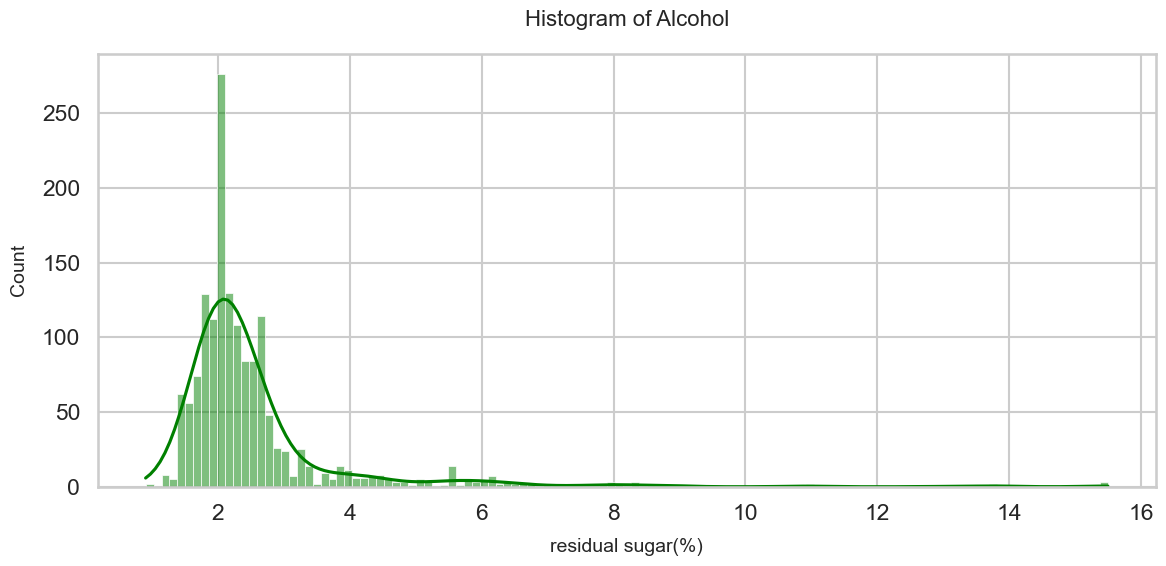

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="residual sugar", kde=True, color="green")
plt.title("Histogram of Alcohol", fontsize=16, pad=20)
plt.xlabel("Residual Sugar(%)", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)
plt.tight_layout()
plt.show()

#### 2.4.1 Potential Outliers and/or Anomalies
From the histogram, most wines have low residual sugar (around 1–2 g/L), but a few go as high as ~15 g/L. This makes the distribution right‐skewed. The boxplot also reveals outliers in residual sugar, as well as in total/free sulfur dioxide, and occasionally in alcohol. These could be special wine styles or errors in the data. Overall, most wines fit the usual ranges, but these extreme values need a closer look.

# 3. Initial Observations/EDA

### 3.1 Correlation Matrix

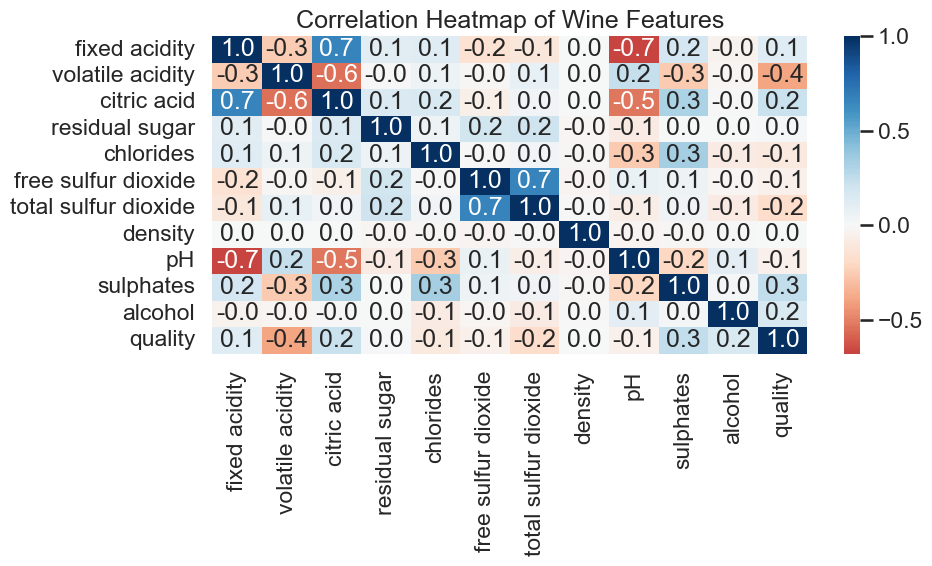

In [53]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="RdBu", center=0, fmt=".1f")
plt.title("Correlation Heatmap of Wine Features")
plt.tight_layout()
plt.show()

From the matrix, volatile acidity stands out with a noticeable negative correlation (-0.4) to quality. On the positive side, sulphates (~+0.3) shows the strongest link to higher quality, followed by citric acid and alcohol (both around +0.2). In other words, wines with slightly higher sulphates, citric acid, or alcohol content tend to get better quality scores, while having higher volatile acidity tends to hurt quality.

### 3.2 Histogram

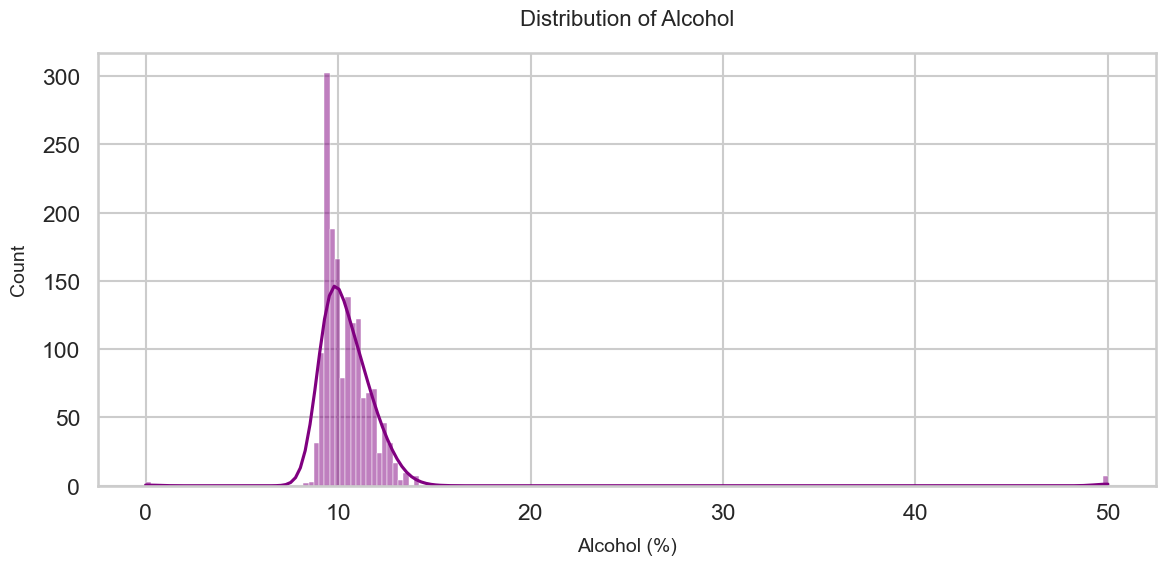

In [55]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="alcohol", kde=True, color="purple")
plt.title("Distribution of Alcohol", fontsize=16, pad=20)
plt.xlabel("Alcohol (%)", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)
plt.tight_layout()
plt.show()

### 3.3 Bar Charts

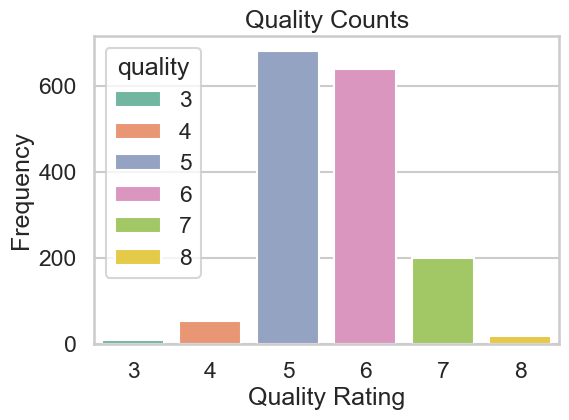

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(x="quality", data=df, palette="Set2", hue="quality")
plt.title("Quality Counts")
plt.xlabel("Quality Rating")
plt.ylabel("Frequency")
plt.show()

# 4. Fix Issues Found